# Clustering Homework 

Image segmentation is a commonly used technique in digital image processing and analysis. Its propose is to partition an image into multiple parts or regions. This taks is often done based on the characteristics of the pixels in the image. One of the characteristics of the pixels in an images is their color. 

In this homework we use two methods of clustering (KMeans and Spectral) to segment a single image.
You need to :

- Import images (kmeans.jpg and spectral.jpg)
- Run clustering algorithms
- Segment the images based on the algorithms
- Plot the segmented images


The images shown in the cells after the code sections, show the desired outputs. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from skimage.color import rgb2gray,gray2rgb
from sklearn.decomposition import PCA

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing images
<ul>
    <li>Import kmean image <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">imread</a></li>
    
</ul>

In [2]:
###########Code Here
#load data
image1 = cv2.imread("kmeans.jpg")
###########

# Preprocessing data
<ul>
    <li>Convert BGR to RGB: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/">cvtColor</a></li>
    <li>Plotting red,blue,green data using ax variable: <a href="https://www.w3schools.com/python/python_ml_scatterplot.asp">scatter</a></li>
    <li>Showing base image: <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/">imshow</a></li>
</ul>

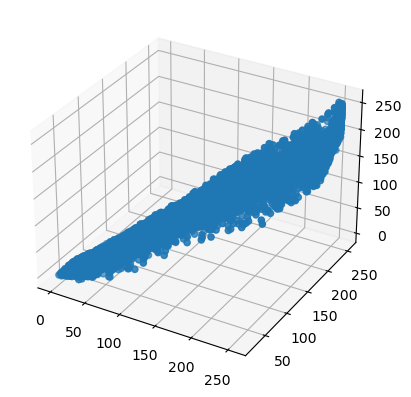

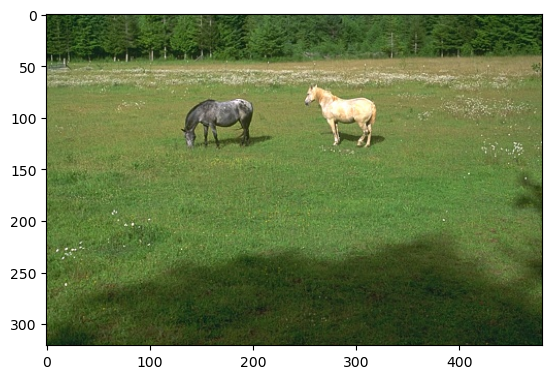

In [3]:
###########Code Here
# 
base = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
###########

r, g, b = cv2.split(base)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
###########Code Here
ax.scatter(r,g,b)


###########


plt.show()



###########Code Here
plt.imshow(base)

###########



plt.show()


<h2>Create standard data for K-means</h2>
<ul>
    <li>Reshaping the base image to a 2D array of pixels and 3 color values (RGB) using reshape method: <a href="https://numpy.org/doc/stable/reference/generated/numpy.reshape.html">reshape</a></li>
    
</ul>

In [4]:
print(base.shape)

(321, 481, 3)


In [5]:




###########Code Here
pixel_values = base.reshape((321* 481, 3))
###########


print(pixel_values.shape)
# convert to float
pixel_values = np.float32(pixel_values)




(154401, 3)


<h2>Kmeans criteria:</h2>
In this section, we set a Kmeans criteria. it means after satisfying which conditions, the algorithm would stop.
<ol>
    <li>Number of iteration = 10000</li>
    <li>Epsilon = 0.001</li>
</ol>

In [6]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.001)


<h2>Creating ellbow plot</h2>
<ol>
    <li>Number of attempts = 10 : run kmeans with 10 different initial points</li>
    <li>Run kmeans with k clusters and above criteria: <a href="https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html">cv2.kmeans</a></li>
    <li>Plot clusters error for 1 to k cluster</li>
</ol>

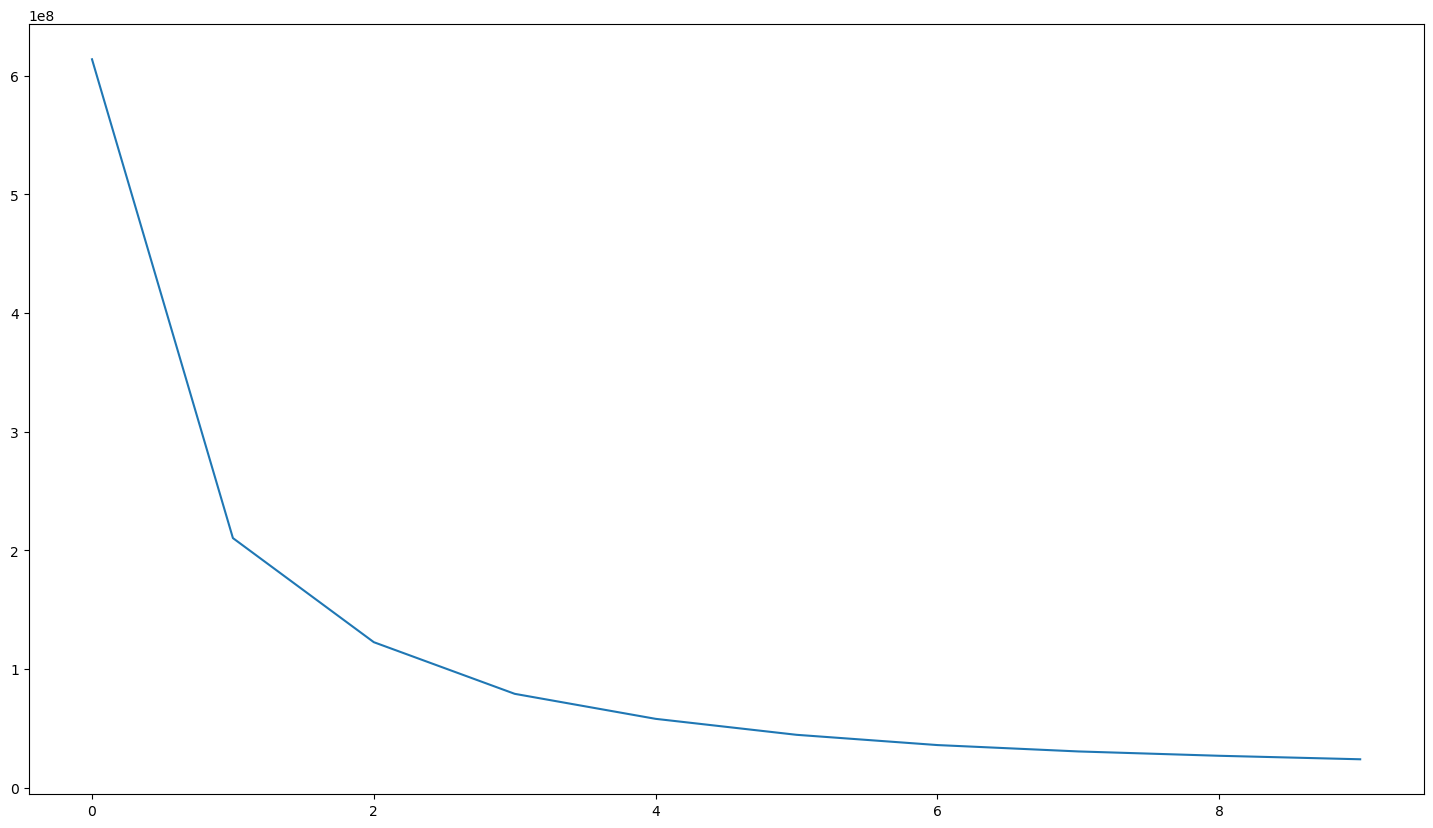

In [7]:
a = []
attempts = 10

for k in range(10):
  
    ###########Code Here
    error,label,center=cv2.kmeans(pixel_values,k+1,None,criteria,2,cv2.KMEANS_RANDOM_CENTERS)
    ##########
    a.append(error)
plt.figure(figsize=(18, 10))
plt.plot(a)
plt.show()


In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png"></img>

<h2>Choosing best K for number of clusters from above elbow plot: ?4</h2>
<ul>
    <li>Choose best k for number of clusters:</li>
    <li>Run kmeans with k clusters and previous criteria: <a href="https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html">cv2.kmeans</a></li>
    
</ul>

In [8]:
###########Code Here
########### Set k and attempts whatever you want
k = 4
attempts = 10
_, labels, (centers) = cv2.kmeans(pixel_values,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
###########

# Ploting segmented image
<ul>
    <li>Creating centers' colors matrix : specific color(RGB) for every center</li>
    <li>Creating segmented_image from centers and labels</li>
    <li>Ploting segmented_image</li>
    
</ul>

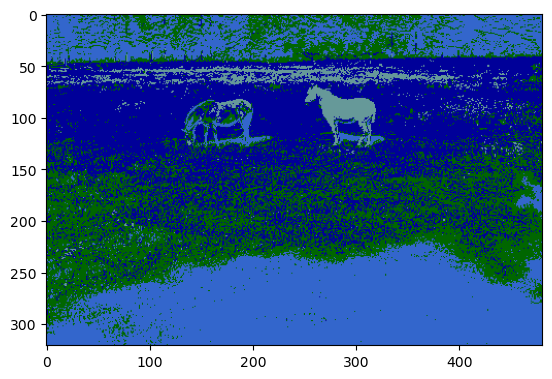

In [9]:
centers=[
    [0,102,0],
    [102, 153, 153],
    [51, 102, 204],
    [0, 0, 153],
    [153, 0, 255],
    [102, 255, 102],
    [255, 255, 102],
    [255, 0, 102],
    [255, 255, 255],
    [51, 153, 255]
]
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(base.shape)
plt.imshow(segmented_image)
plt.show()

# Importing new library

In [10]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Importing  image
<ul>
    <li>Import Grayscale image: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">cv2.IMREAD_GRAYSCALE</a></li>
    <li>Show Grayscale image</li>
    <li>Converting Grayscale into Black&White: <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">cv2.IMREAD_GRAYSCALE</a></li>
    <li>Creating a mask for image2 with True instead of 1 and False instead of 0 in image2 </li>
</ul>
We use mentioned mask to create a graph from specific pixels instead of all pixels (For complexity issues).

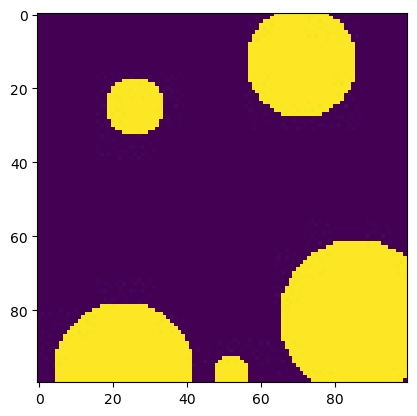

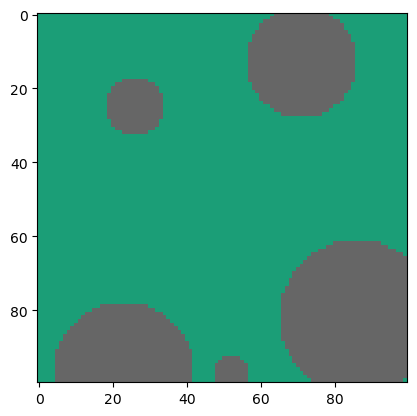

In [18]:
###########Code Here
image2 = cv2.imread("spectral.jpg",cv2.IMREAD_GRAYSCALE)

#show image
plt.imshow(image2)
plt.show()
###########

#convert into black and white
thresh = 128

###########Code Here
# threshold image

ـ, binary_image2 = cv2.threshold(image2, thresh, 1, cv2.THRESH_BINARY)

binary_image2 = binary_image2.astype(float)

###########

# mask of image2
mask = binary_image2.astype(bool)
plt.imshow(binary_image2,cmap='Dark2')

# Creating graph for image2 with created mask
<ul>
    <li>Use the img_to_graph function of an image library to create a graph of pixels: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.img_to_graph.html">image.img_to_graph</a></li>
    <li>Use similarity function for weights of graph</li>
    
</ul>

In [19]:
###########Code Here
graph = image.img_to_graph(binary_image2, mask=mask)
###########

graph.data = np.exp(-graph.data / graph.data.std())


# Use spectral_clustering
<ul>
    <li>Use spectral_clustering function(it returns labels) :<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html">spectral_clustering</a></li>
    <li>Set assign_labels in spectral_clustering's parameters to 'kmeans'</li>
    <li>Set n_clusters in spectral_clustering's parameters to the best value related to your specific image</li>
    
</ul>

In [20]:
###########Code Here
labels = spectral_clustering(graph, n_clusters=5, assign_labels="kmeans", n_components=3)
###########

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# Ploting segmented image
<ul>
    <li>Creating matrix with shape of mask and value of -1 : -1 because of background-color</li>
    <li>Change every yellow index of image2 with new colors in labels</li>
    
</ul>

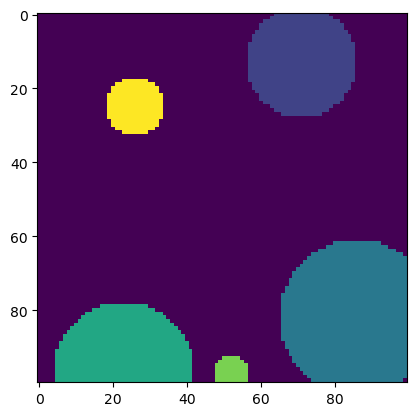

In [21]:
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels
plt.imshow(label_im)